In [6]:
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
from skimage import io, img_as_float
from scipy.signal import convolve2d, correlate2d, fftconvolve, gaussian

# Filtering in the frequency domain

Comparing filtering in spatial and frequency domains using built-in functions

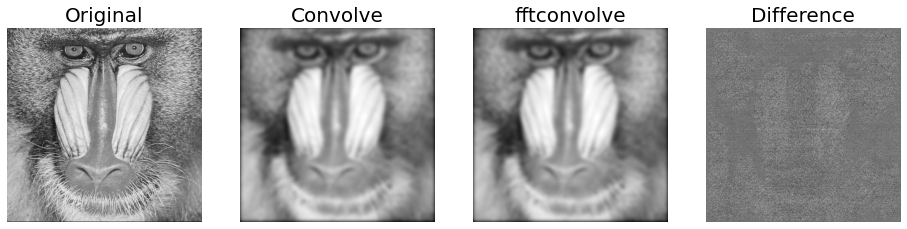

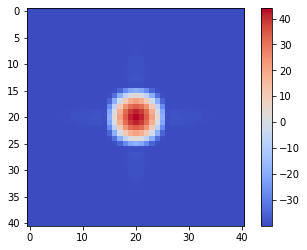

In [2]:
im = np.mean(io.imread('images/mandrill.tiff'), axis=2)
gauss_kernel = np.outer(gaussian(41,5), gaussian(41,5))
im_blur1 = convolve2d(im, gauss_kernel,mode='same')
im_blur2 = fftconvolve(im, gauss_kernel, mode='same')

plot_dim = (1,4)
cnt = 0
fig,axes = plt.subplots(nrows=plot_dim[0], ncols=plot_dim[1], figsize=(16,8),sharex=True, sharey=True)
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im, cmap='gray')
plt.title('Original', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur1, cmap='gray')
plt.title('Convolve', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur2, cmap='gray')
plt.title('fftconvolve', size=20), plt.axis('off')
cnt += 1
plt.subplot(plot_dim[0],plot_dim[1],cnt), plt.imshow(im_blur1-im_blur2, cmap='gray')
plt.title('Difference', size=20), plt.axis('off')

plt.show()

F_g = fp.fft2(fp.ifftshift(gauss_kernel))
S_g = np.abs(F_g)
S_g_scaled = 20*np.log10(fp.fftshift(S_g) + 0.01)
#plt.imshow(S_g_scaled, cmap='gray')
plt.imshow(S_g_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

## Visualize Gaussian low pass filters in 2D 

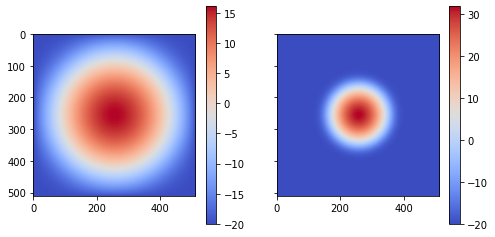

In [3]:
gauss_kernel_1 = np.outer(gaussian(im.shape[0],1.0), gaussian(im.shape[1],1.0))
F_g_1 = fp.fft2(fp.ifftshift(gauss_kernel_1))
S_g_1 = np.abs(F_g_1)
S_g_1_scaled = 20*np.log10(fp.fftshift(S_g_1) + 0.1)

gauss_kernel_2 = gauss_kernel_1 = np.outer(gaussian(im.shape[0],2.5), gaussian(im.shape[1],2.5))
F_g_2 = fp.fft2(fp.ifftshift(gauss_kernel_2))
S_g_2 = np.abs(F_g_2)
S_g_2_scaled = 20*np.log10(fp.fftshift(S_g_2) + 0.1)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4),sharex=True,sharey=True)
plt.subplot(1,2,1), plt.imshow(S_g_1_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.subplot(1,2,2), plt.imshow(S_g_2_scaled, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.show()

## Visualize Gaussian lowpass filters in 3D

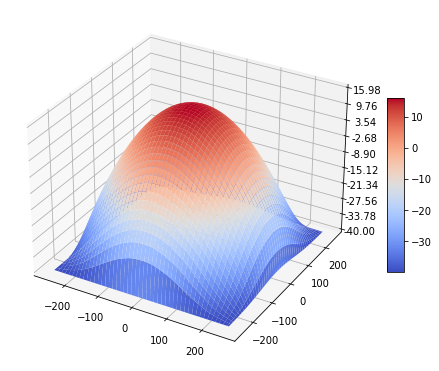

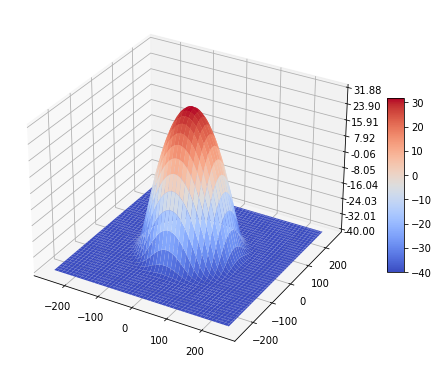

In [7]:
def plot_freq_spec_3D(S):
    ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
    Y = np.arange(-S.shape[0]//2,S.shape[0]-S.shape[0]//2)
    X = np.arange(-S.shape[1]//2,S.shape[1]-S.shape[1]//2)
    X, Y = np.meshgrid(X, Y)
    Z = (20*np.log10( 0.01 + fp.fftshift(S))).real
    surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,linewidth=0, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')
    fig.colorbar(surf,shrink=0.4, aspect=10)
    plt.show()
    
#plot_freq_spec_3D(S_gau)
#plot_freq_spec_3D(S_im)
plot_freq_spec_3D(S_g_1)
plot_freq_spec_3D(S_g_2)

    

(256, 256)


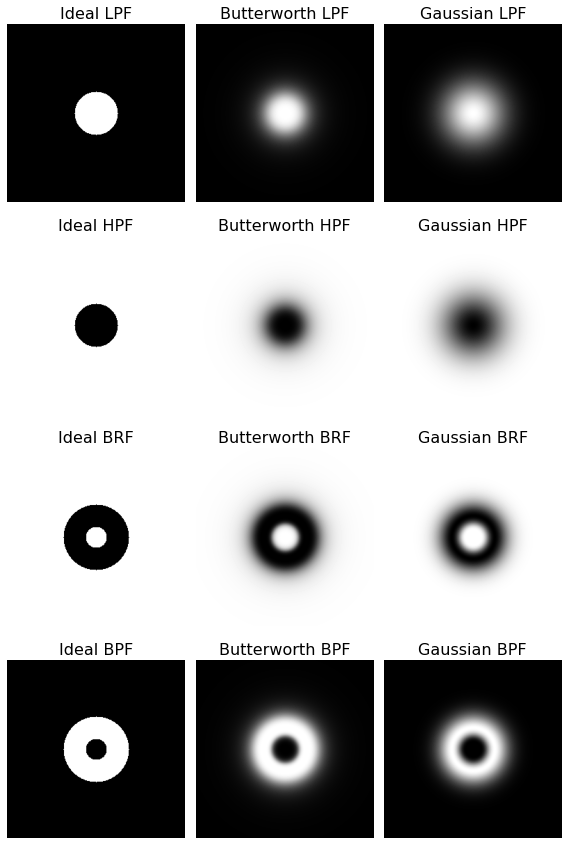

In [8]:
im = img_as_float(io.imread('images/cameraman.tif'))
print(im.shape)
u = np.arange(0, im.shape[0], 1)
v = np.arange(0, im.shape[1], 1)
idx = np.where(u > im.shape[0]/2)
u[idx] = u[idx] - im.shape[0]
idy = np.where(v > im.shape[1]/2)
v[idy] = v[idy] - im.shape[1]
V, U = np.meshgrid(v, u)
#Note without the sqrt, it is hard to achieve expected results by 
#altering the sigma
D = np.sqrt(V**2 + U**2)
sigma = 31
vari = sigma**2
n = 2
w = 32

L_i = np.zeros(D.shape)
ind = np.where(D <= sigma)
L_i[ind] = 1
L_b = 1/(1+(D/sigma)**(2*n))
L_g = np.exp(-(D**2/(2*vari)))

H_i = 1 - L_i
H_b = 1 - L_b
H_g = 1 - L_g

BR_i = np.zeros(D.shape)
# the following line of code suppress the warning on divide-by-zero errors in Butterworth or Gaussian filters.
np.seterr(divide='ignore')
#ind1 = np.where(D > (sigma + w/2))
#ind2 = np.where(D < (sigma-w/2))
BR_i[np.where(D > (sigma + w/2))] = 1
BR_i[np.where(D < (sigma-w/2))] = 1
BR_b = 1/(1+(w*D/(D**2 - sigma**2))**(2*n))
BR_g = 1 - np.exp(-((D**2-vari)/(w*D))**2)

BP_i = 1 - BR_i
BP_b = 1 - BR_b
BP_g = 1 - BR_g

#Display the filters
L_i_shift = fp.ifftshift(L_i)
L_b_shift = fp.ifftshift(L_b)
L_g_shift = fp.ifftshift(L_g)

H_i_shift = fp.ifftshift(H_i)
H_b_shift = fp.ifftshift(H_b)
H_g_shift = fp.ifftshift(H_g)

BR_i_shift = fp.ifftshift(BR_i)
BR_b_shift = fp.ifftshift(BR_b)
BR_g_shift = fp.ifftshift(BR_g)

BP_i_shift = fp.ifftshift(BP_i)
BP_b_shift = fp.ifftshift(BP_b)
BP_g_shift = fp.ifftshift(BP_g)

disp_sz = (4, 3)
cnt = 0
fig, axes = plt.subplots(nrows=disp_sz[0], ncols=disp_sz[1], 
                          figsize=(8,12), 
                          sharex=True, sharey=True)
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(L_i_shift, cmap='gray')
plt.title('Ideal LPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(L_b_shift, cmap='gray')
plt.title('Butterworth LPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(L_g_shift, cmap='gray')
plt.title('Gaussian LPF', size = 16), plt.axis('off')

cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(H_i_shift, cmap='gray')
plt.title('Ideal HPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(H_b_shift, cmap='gray')
plt.title('Butterworth HPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(H_g_shift, cmap='gray')
plt.title('Gaussian HPF', size = 16), plt.axis('off')

cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BR_i_shift, cmap='gray')
plt.title('Ideal BRF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BR_b_shift, cmap='gray')
plt.title('Butterworth BRF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BR_g_shift, cmap='gray')
plt.title('Gaussian BRF', size = 16), plt.axis('off')

cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BP_i_shift, cmap='gray')
plt.title('Ideal BPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BP_b_shift, cmap='gray')
plt.title('Butterworth BPF', size = 16), plt.axis('off')
cnt += 1
plt.subplot(disp_sz[0],disp_sz[1],cnt), plt.imshow(BP_g_shift, cmap='gray')
plt.title('Gaussian BPF', size = 16), plt.axis('off')

plt.savefig('images/filters_F.png', format='png')
plt.tight_layout()
plt.show()